# Lab Activity 5.3. Gradient Descent on Linear Regression: Vanilla and Vectorized and Stochastic

In this activity, you will see how to implement stochastic gradient descent using numpy. You will also examine how to conduct a grid search to find the best learning rate for a model.

**Learning Outcomes**
1. Implement gradient descent and stochastic gradient decent solutions for a linear regression problem
2. Learn how to take advantage of vectorization to make the implementation more efficient 
3. Apply grid search on the learning rate
4. See the effect of learning rate on overfitting and underfitting
5. Study the effect of the batch size on the performance of the SGD algorithm for LR

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm
import time

## **Vanilla Gradient Descent (No Vectorization)**
Recall you that the Vanilla Gradient Descent is the most basic implementation of the gradient descent optimization algorithm. It involves iteratively adjusting the model parameters (weights) to minimize a given loss function. The key feature of "vanilla" gradient descent is that it operates on each data point individually, without leveraging vectorization for efficiency.

### **How It Works:**

1. **Initialization.** Start by initializing the model parameters (weights) to random values or zeros.

2. **Compute Predictions.** For each data point $i$, calculate the predicted output $y_i = f(x_i, w)$, where $x_i$ is the input feature and $w$ is the weight.

3. **Compute Loss.** Measure the difference between the predicted output $y_i$ and the true target $t_i$ using a loss function, such as Mean Squared Error (MSE):
     $$
     J(w) = \frac{1}{N} \sum_{i=1}^N (t_i - y_i)^2
     $$

4. **Calculate Gradients.* For each data point, compute the gradient of the loss with respect to the model parameters $w$:
     $$
     \nabla J(w) = \frac{\partial J}{\partial w}
     $$

5. **Update Weights.** Adjust the weights using the gradient and a learning rate $\eta$:
     $$
     w = w - \eta \cdot \nabla J(w)
     $$

6. **Repeat.** Iterate through the dataset, updating the weights until the loss converges or the maximum number of iterations is reached.

---

### **Characteristics of Vanilla Gradient Descent:**

- **Sequential Computation:** Each data point is processed one at a time in a loop, making it computationally expensive for large datasets.
- **No Vectorization:** Gradients are computed and applied individually for each parameter, without leveraging matrix operations for efficiency.
- **Slow Convergence:** Without vectorized operations, convergence can be much slower compared to optimized methods.

Let us first see how to implement a simple gradient descent algroithm for linear regression, where we use 'for' loops without utilizing vectorization.

In [3]:
# Gradient Descent no vectorised...............
def GD_vanilla(X,t, eta=0.001, maxep=100, decay=0.98): # t is the target
    start_time = time.time()
    
    N = len(t)                  # number of data points    
    w = np.zeros((2,1))         # initialise w
    J = np.zeros((maxep))       # the loss in each epoch 
    for ep in range(maxep):     # epochs
        for n in range(N):      # iterate through the data
            
            w     += (1.0/(  N))*eta*X[n,:].T*(t[n] - w.T* X[n,:].T)
            J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2
        
        eta *= decay
        
    tme = time.time() - start_time
    return w, J, tme

## Vectorized Gradient Descent on LR

Ok, now we implement the same algorithm but we take advantage of vectorization. In particular, note how we converted the iteration through the dataset points (by taking advantage of matrices) to vector multiplications.

In [4]:
# Gradient Descent vectorized...............
def GD_vectrzd(X,t, eta=0.001, maxep=100, decay=0.98): # vectorized
    start_time = time.time()
    
    N = len(t)                  # number of data points    
    w = np.zeros((2,1))         # initialise w
    J = np.zeros((maxep))       # the loss in each epoch
    for ep in range(maxep):     # epochs
        
        w     +=  (1.0/(  N))*eta*X.T*(t - X*w) 
        J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss
        
        eta   *=  decay
    tme = time.time() - start_time
    return w, J, tme


## Output Helper Function 

Add some ploting capabilties

In [5]:
def outGD(J, w, tme, name='GD',ax=None, plotJ=True, printw=True):        
    if plotJ:
        ax = ax or plt.gca()
        ax.plot(J[1:],'.b')
    if printw:
        print("y = {} + {} X1".format(w[0],w[1]), " {} took:    {} seconds ".format(name, tme))
        #print("y = {:.3f} + {:.3f} X1".format(w[0],w[1]), " {} took:    {:.6f} seconds ".format(name, tme))


Ok, so now we are ready to apply the two algorithms that we have developed above on some data. We like applying newly developed algorithms on synthetic data because it gives us the freedom to control the shape and complexity of the data in order to gain insight of the algorithm's capabilities.

## Generate the Data

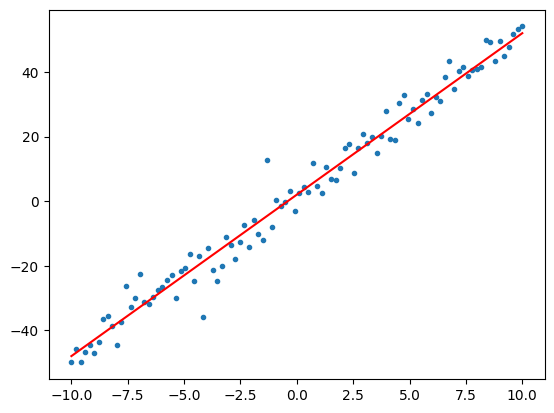

In [6]:
# generate the data
def realFunc(x1):
    return 2 + 5*x1 
    #return 2 + 5*x1**2

def generate_data(N=100, noise=5):
    N = N
    noise = noise # 5 #0 # 10
    x1 = np.linspace(-10.0,10.0,N) 
    t  = np.random.normal(realFunc(x1),noise) # target with noise

    #plot the data along the real model
    plt.plot(x1,t,'.')
    plt.plot(x1,realFunc(x1),'r')
    return x1, t
    # generate model solution
    
def prepare_data(x1,t):
    # data preparation
    x0= np.ones(len(x1))     
    #X = np.vstack((x0,x1)).T   # add dummy feature
    X = np.c_[x0,x1]            # add dummy feature
    X = np.matrix(X)            # convert to matrices, you can get rid of this and use the dot operations instead of * 
    t = np.matrix(t).T
    return X, t

x1, t = generate_data()
X, t = prepare_data(x1, t)

C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3165601515.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2


y = [0.08539934] + [3.89364573] X1  GD_vanilla took:    0.3228328227996826 seconds 
y = [0.08786668] + [3.90921879] X1  GD_vectrzd took:    0.0 seconds 


C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3800312249.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss


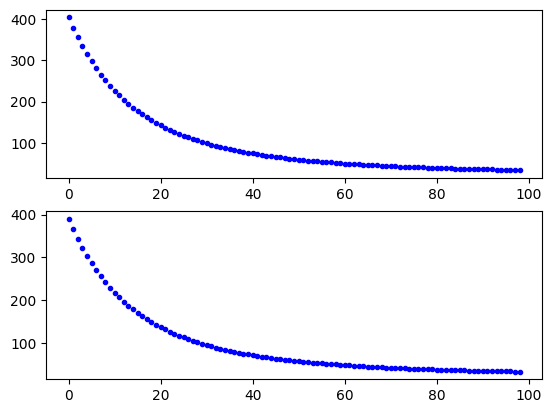

In [7]:
# hyper parameters.......................................
maxep = 100                    # maximum number of epochs
eta   = 0.001                  # learning rate
decay = 0.98                   # decay factor
# ok now compare vanila with vectroised..................
fig, (ax1, ax2) = plt.subplots(2)

w,J, tme = GD_vanilla(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vanilla', ax1)

w,J, tme = GD_vectrzd(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vectrzd', ax2)

If you play with the learning rate you might encounter instances at which SGD vanilla is more resilient to overfitting, while the vectorized SGD can go quickly into spurious weights when $\eta$ is high. However, the vectorized SGD is far more stable for lower $\eta$ values and much faster for more complex datasets. Note the big difference in how many second each took. Let us see these issues first-hand.

### Overfitting due to high learning rate $\eta$ and high number of epochs

### Hyper parameters
First we set the hyper parameters

In [8]:
maxep = 100                    # maximum number of epochs
eta   = 0.2                    # learning rate
decay = 0.98                   # decay factor

### Compare vanila with vectroized
ok now compare vanila with vectroized

C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3165601515.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2


y = [2.04479168] + [5.058796] X1  GD_vanilla took:    0.30731916427612305 seconds 
y = [-2.42199612e+09] + [38.81380404] X1  GD_vectrzd took:    0.0 seconds 


C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3800312249.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss


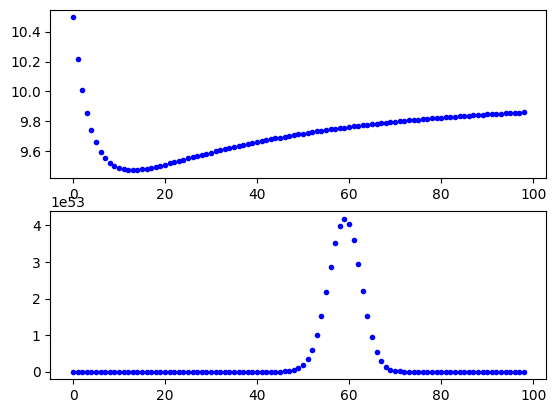

In [9]:
fig, (ax1, ax2) = plt.subplots(2)

w,J, tme = GD_vanilla(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vanilla', ax1)

w,J, tme = GD_vectrzd(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vectrzd', ax2)

### Underfitting due to low value $\eta$

C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3165601515.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2


y = [0.00891809] + [0.6921536] X1  GD_vanilla took:    0.2962779998779297 seconds 
y = [0.00895689] + [0.6927499] X1  GD_vectrzd took:    0.00653386116027832 seconds 


C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3800312249.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss


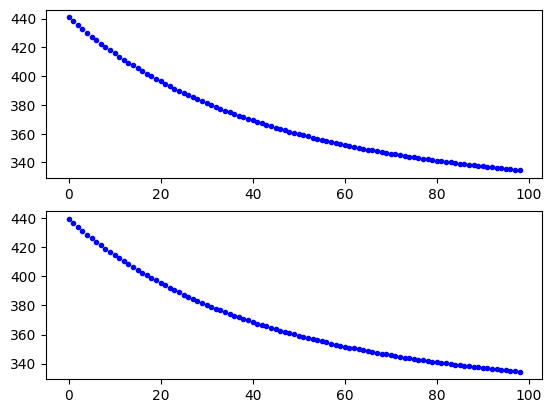

In [10]:
# hyper parameters.......................................
maxep = 100                    # maximum number of epochs
eta   = 0.0001                  # learning rate
decay = 0.98                   # decay factor
# ok now compare vanila with vectroised..................
fig, (ax1, ax2) = plt.subplots(2)

w,J, tme = GD_vanilla(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vanilla', ax1)

w,J, tme = GD_vectrzd(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vectrzd', ax2)

## Grid Search: Comprehensive Comparison on the learning rate $\eta$

Let us conduct a comprehensive comparison for different learning rates to study the effect of the learning rate on both algorithms.

**Warning.** This is quite expensive... so please be patient as it might take a while to try out all of these learning rates. Once this finishes, the next step will be to visualize the results.

### Hyper parameters

In [11]:
maxep = 100                    # maximum number of epochs
#eta   = 0.001                 # learning rate
decay = 0.98                   # decay factor

### Compare vanilla with vectorized
ok now compare vanilla with vectorized

In [12]:
etasL = np.arange(0.01,0.15,0.005)      # reasonably low values
etasH = np.arange(0.16,0.5, 0.05)      # High values that cause SGD vectorised to go a bit mad :-)
etas  = np.concatenate((etasL , etasH)) # combine both

Jv = np.zeros(len(etas))
Jz = np.zeros(len(etas))
for i, eta in enumerate(etas):                  # learning rate
    w_v,J_v,_ = GD_vanilla(X,t, eta, maxep, decay)
    w_z,J_z,_ = GD_vectrzd(X,t, eta, maxep, decay)

    Jv[i] = np.sum(J_v[-10:-1]/10.0)
    Jz[i] = np.sum(J_z[-10:-1]/10.0)
    #print(Jv[i]/len(J_v))

C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3165601515.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2
C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3800312249.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss


### Visualizing the Effect of Learning Rates on the Model

Ok let us visualize the results to see how the performance changes with the learning rate.

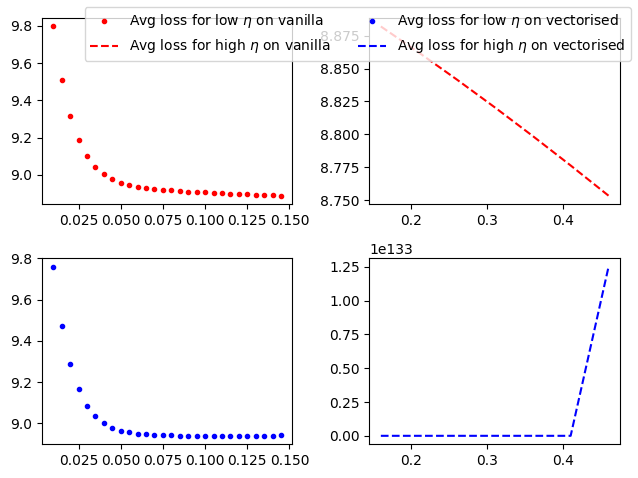

In [13]:
fig, (ax1, ax2) = plt.subplots(2,2)

ax1[0].plot(etasL,Jv[:len(etasL)],'.r', label='Avg loss for low $\\eta$ on vanilla')
ax2[0].plot(etasL,Jz[:len(etasL)],'.b',  label='Avg loss for low $\\eta$ on vectorised')

ax1[1].plot(etasH,Jv[len(etasL):], '--r', label='Avg loss for high $\\eta$ on vanilla')
ax2[1].plot(etasH,Jz[len(etasL):],'--b', label='Avg loss for high $\\eta$ on vectorised')

fig.legend(ncol=2)
fig.tight_layout()


## Stochastic Gradient Descent for Linear Regression

Let us finally conclude by implementing a Stochastic Gradient descent Algorithm by adding the idea of Mini-Batch in our already developed algorithm.

You may want to think about how to do this first before you look at the code...


In [14]:
def SGD_vectrzd(X,t, eta=0.001, maxep=100, decay=0.98, b=25): # vectorised
    start_time = time.time()
    b = b                              # mini-batch size
    N = len(t)                         # number of data points    
    w = np.zeros((2,1))                # initialise w
    J = np.zeros((maxep))              # the loss in each epoch
    for ep in range(maxep):            # epochs
        for tau in range(int(N/b)):    # No. of batches
            X_= X[tau*b:(tau+1)*b,:]   # take input batch 
            t_= t[tau*b:(tau+1)*b]     # take corresponding target batch
            
            w +=  (1.0/(  N))*eta*X_.T*(t_ - X_*w)                  # mini-batch Weights update
            J_ =  (1.0/(2*N))*         (t_ - X_*w).T * (t_ - X_*w)  # mini-batch loss
            
            J[ep]+=J_
        eta *= decay
    tme = time.time() - start_time
    return w, J, tme

## Compare Vanilla, Vectorized GD and Vectorized SGD

Let us now apply the three algorithms on our synthetic data and see how well they all perform

C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3165601515.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep] += (1.0/(2*N))*             (t[n] - w.T* X[n,:].T)**2


y = [0.24867058] + [5.00840129] X1  GD_vanila took:    0.6429450511932373 seconds 
y = [0.26827952] + [5.01455096] X1  GD_vectrzd took:    0.0 seconds 
y = [0.24977603] + [5.01391037] X1  SGD_vectrzd took:    0.024811744689941406 seconds 


C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\3800312249.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]  =  (1.0/(2*N))* (t - X*w).T * (t - X*w) # the loss
C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\836761637.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]+=J_


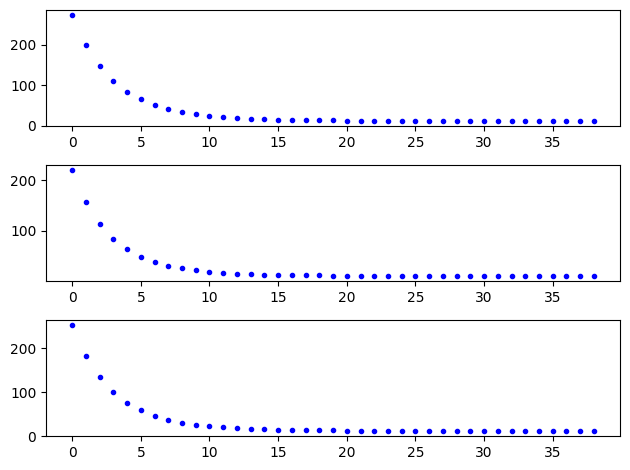

In [15]:
maxep = 40                    # maximum number of epochs
eta   = 0.005                 # learning rate
decay = 0.98                  # decay factor
# ok now compare vanila with vectroised..................
fig, (ax1, ax2, ax3) = plt.subplots(3)

w,J, tme = GD_vanilla(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vanila', ax1)

w,J, tme = GD_vectrzd(X,t, eta, maxep, decay)
outGD(J, w, tme, 'GD_vectrzd', ax2)

w,J, tme = SGD_vectrzd(X,t, eta, maxep, decay)
outGD(J, w, tme, 'SGD_vectrzd', ax3)

fig.tight_layout()

We can see that the GD_vectrzd is faster in this than SGD_vectrzd, this is generally true when the dataset is small and can be fit by its entirety in the memory. When the dataset is large and we need to chunk it into pieces SGD_vectrzd is faster and produce results as good as the GD_vectrzd

## Your Turn

### 1. Batch Size Optimizaiton Study

There is a **sweet spot for batch size b**. Your mission is to discover what is it for the given dataset.


Try to study the effect of the batch size on the performance and efficiency of the stochastic gradient descent algorithms.

You would want to consider employing a grid search on b of the SGD_vectrzd and then plot the results similar to what we have done in the previous section.

Ok, to help you we have added, admittedly, the code that you need :)


C:\Users\stahi\AppData\Local\Temp\ipykernel_15660\836761637.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[ep]+=J_


sweet spot= 25


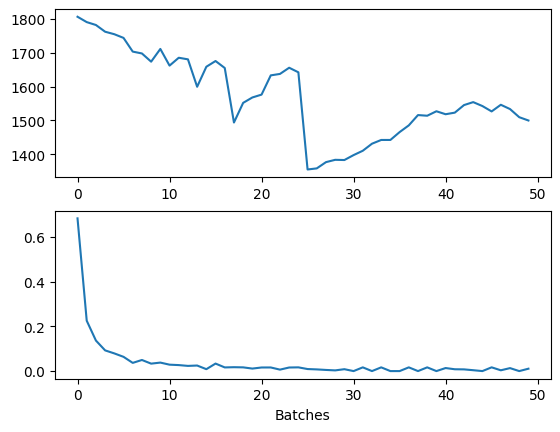

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1)

maxep = 40                    # maximum number of epochs
eta   = 0.005                 # learning rate
decay = 0.98                  # decay factor

N = X.shape[0]
bs = np.arange(1, N, step=2)
J_SGD = np.zeros(len(bs))     # to hold the loss of the SGD_vectrzd for each batch size 
tm_SGD = np.zeros(len(bs))    # to hold the time of the SGD_vectrzd for each batch size 

for i, batch in enumerate(bs):
    
    pass 
    _,J_SGD_i, tm_SGD[i] = SGD_vectrzd(X,t, eta, maxep, decay, b=batch)
    J_SGD[i]  = J_SGD_i.sum()
    
ax2.set_xlabel("Batches")
ax1.plot(J_SGD,'-', label = "loss for SGD")
ax2.plot(tm_SGD,'-', label="time needed to learn") #
print("sweet spot=", J_SGD.argmin())
# add some annotation for the figures and find the minimum for the loss
# ...


### Implement R2

Implement a function that calculate R2 = 1- SSE/SST

### 2. Split the data 
Consider splitting the data into training and testing and apply the above training procedures on the training data and measure the performance (RMSE, R2) on the testing data.